# Superstore Sales Dataset

## Context
Retail dataset of a global superstore for 4 years.

## Source
The dataset is from Kaggle and can be found on https://www.kaggle.com/rohitsahoo/sales-forecasting.

## Description		
| Variable | Description |
| :- | :- |

In [1]:
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import csv
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")

## Data Import

In [2]:
path = r"data\train.csv"
df = pd.read_csv(path, encoding = "ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Initial EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Only the column "Postal Code" contains missing values. Let's replace the missing values with the according postal code of the cities.

In [29]:
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Luckily, all missing postal codes are from Burlington in Vermont. Let's replcace them with the postal code 05401 (after googling this one ;) )

In [34]:
df["Postal Code"] = df["Postal Code"].fillna(5401)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Let's now also transform the columns "Order Date" and "Ship Date", such that they are in the datetime format. This is later required to also visualize some values against the time component.

In [83]:
df["Order Date"] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df["Ship Date"] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

Now, the pandas function "describe" is called. This is always nice to get the first insights into the numerical features and their value ranges and some statistics.

In [85]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55217.343265,230.769059
std,2829.160653,32066.750532,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Seems like Row ID column is only containing unique values. Let's check that and drop them in case that's true, because columns with only unique values are not delivering any usefull features for machine learning.

In [86]:
for col in df.columns:
    print(f"Column {col} contains {len(df[col].unique())} unique values ({ 100 * len(df[col].unique()) / df.shape[0]}% of total data).")

Column Row ID contains 9800 unique values (100.0% of total data).
Column Order ID contains 4922 unique values (50.224489795918366% of total data).
Column Order Date contains 1230 unique values (12.551020408163266% of total data).
Column Ship Date contains 1326 unique values (13.53061224489796% of total data).
Column Ship Mode contains 4 unique values (0.04081632653061224% of total data).
Column Customer ID contains 793 unique values (8.091836734693878% of total data).
Column Customer Name contains 793 unique values (8.091836734693878% of total data).
Column Segment contains 3 unique values (0.030612244897959183% of total data).
Column Country contains 1 unique values (0.01020408163265306% of total data).
Column City contains 529 unique values (5.3979591836734695% of total data).
Column State contains 49 unique values (0.5% of total data).
Column Postal Code contains 627 unique values (6.3979591836734695% of total data).
Column Region contains 4 unique values (0.04081632653061224% of to

Okay. The columns "Row ID" can be dropped. In addition, the column "Order ID" is also containing a lot of unique values. Let's later investigate this feature further. Furthermore, the feature "Country" can also be dropped, because it is always the same value and therefore not helpful for the model later on.

In [87]:
df_changed = df.drop(columns=["Row ID", "Country"])
df_changed.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [88]:
df_changed['Order Date'] =  pd.to_datetime(df_changed['Order Date'], format='%d/%m/%Y')
df_changed['Ship Date'] =  pd.to_datetime(df_changed['Ship Date'], format='%d/%m/%Y')

In [89]:
df_changed.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [90]:
df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9800 non-null   float64       
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

Start with more detailed EDA. <br> <br>
Let's first plot a histogram of the Sales data.

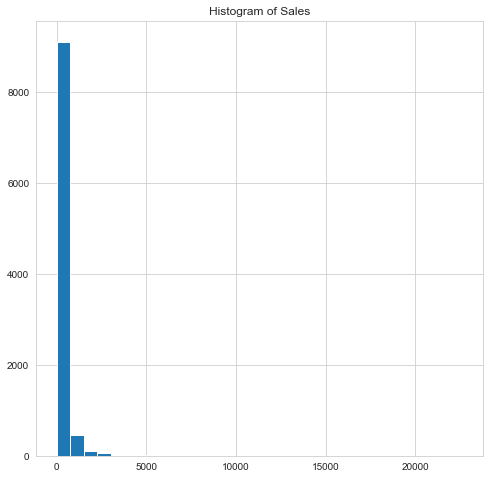

In [91]:
plt.title(f"Histogram of Sales")
plt.hist(df_changed["Sales"], bins=30)
plt.show()

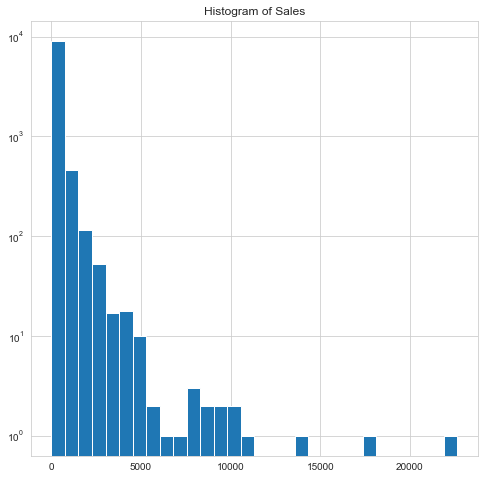

In [92]:
plt.title(f"Histogram of Sales")
plt.hist(df_changed["Sales"], bins=30)
plt.yscale("log")
plt.show()

The sales target value is left skewed. This could lead to problems in correctly predicting the target sales data. Let's later investigate some skewness correction techniques. <br> <br>
Let's now create a list of all categorical features and let's check how many categories each categorical feature has. Then as a next step, the categorical features are visualized and pre-processed, if required.

In [93]:
cat_features = df_changed.columns[df_changed.dtypes == np.object].to_list()
cat_features

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [94]:
for cat_feature in cat_features:
    print(df_changed[cat_feature].value_counts())

CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: Order ID, Length: 4922, dtype: int64
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: Customer ID, Length: 793, dtype: int64
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: Customer Name, Length: 793, dtype: int64
Consumer       5101
Corporate      2953
Home Office    1746
N

### State
Let's investigate the categorical feature "State". Let's check where the customers are from. Let's also check the Sales per State.

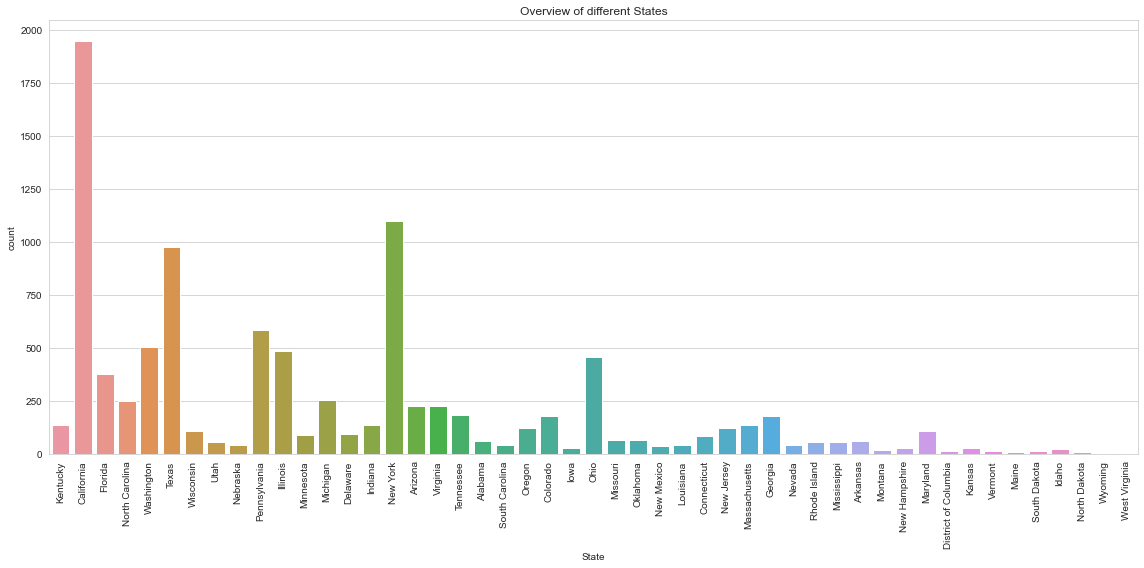

In [103]:
plt.figure(figsize=(16.0, 8.0))
sns.countplot(data=df_changed, x="State")
plt.title("Overview of different States")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r"figures\states_countplot.pdf")
plt.show()

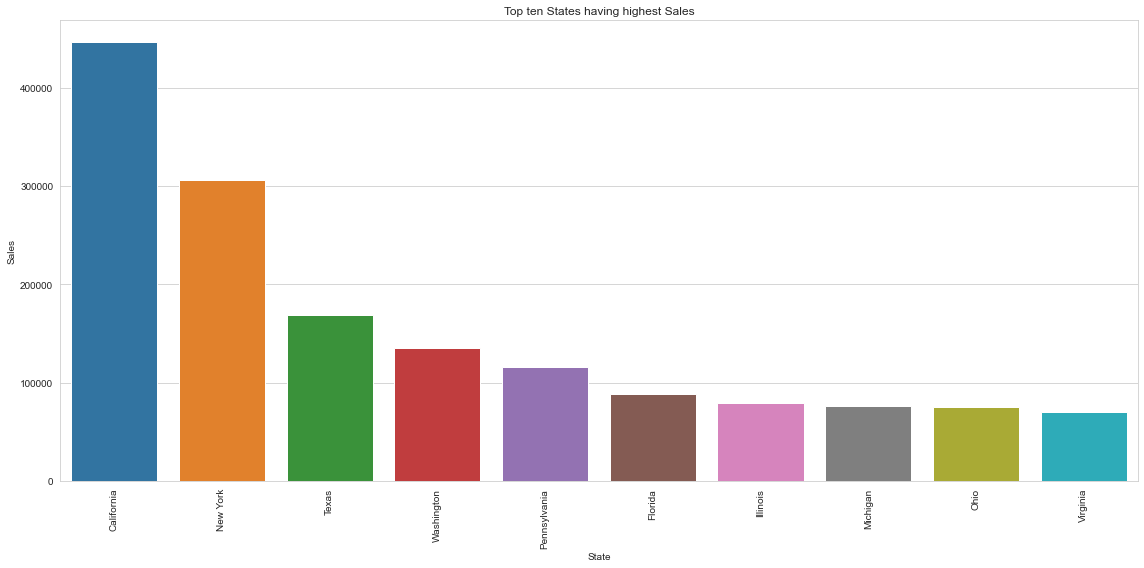

In [102]:
# Let's plot the sales per state
top_states_per_sale = df_changed.groupby(by=["State"]).sum().sort_values("Sales", ascending=False).reset_index().head(10)

plt.figure(figsize=(16.0, 8.0))
sns.barplot(data=top_states_per_sale, x="State", y="Sales")
plt.title("Top ten States having highest Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r"figures\top_ten_states_using_sales.pdf")
plt.show()

California has the highest number of sales. This also makes sense, becasue California is the largest state in the United States of America. California is followed by New York, where also a lot of whealthier people are living.

### City
Let's now further investigate the categorical feature "City". And here, we can also plot the ten largest cities according to the sales numbers.

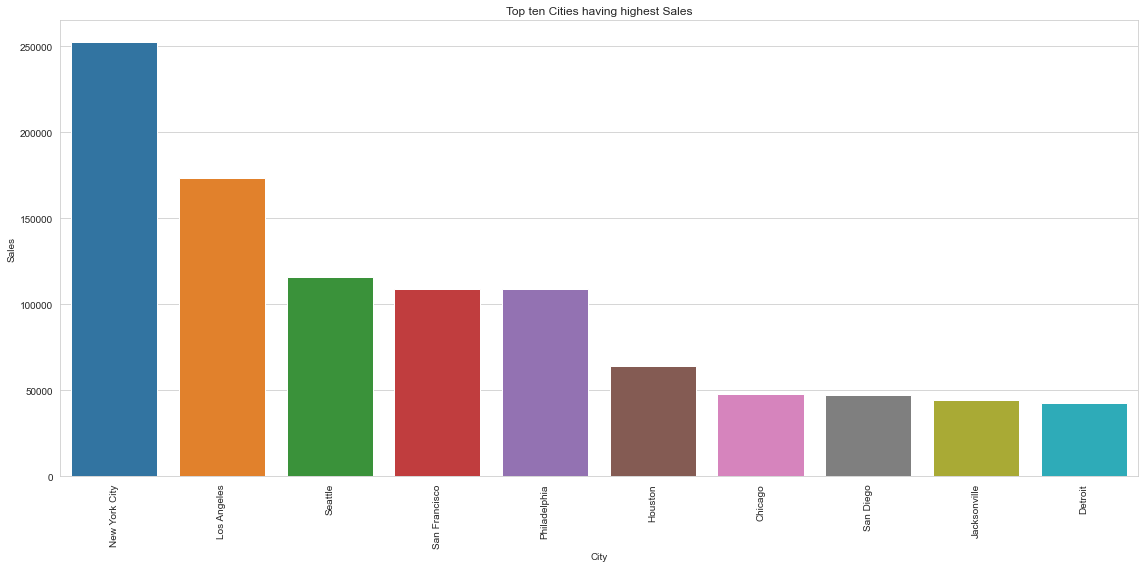

In [101]:
top_cities_using_sale = df_changed.groupby(by="City").sum().sort_values("Sales", ascending=False).reset_index().head(10)

plt.figure(figsize=(16.0, 8.0))
sns.barplot(data=top_cities_using_sale, x="City", y="Sales")
plt.title("Top ten Cities having highest Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r"figures\top_ten_cities_using_sales.pdf")
plt.show()

As one would have guessed, New York City is the leading city. Los Angeles and San Francisco also have a lot of sales. This also makes sense, because California is the state with the highest number of sales and LA and San Francisco are the two largest cities of California.

### Customer Name
Let's now further investiate the customer names and their sales. Let's also find the customer leading to the highest sales.

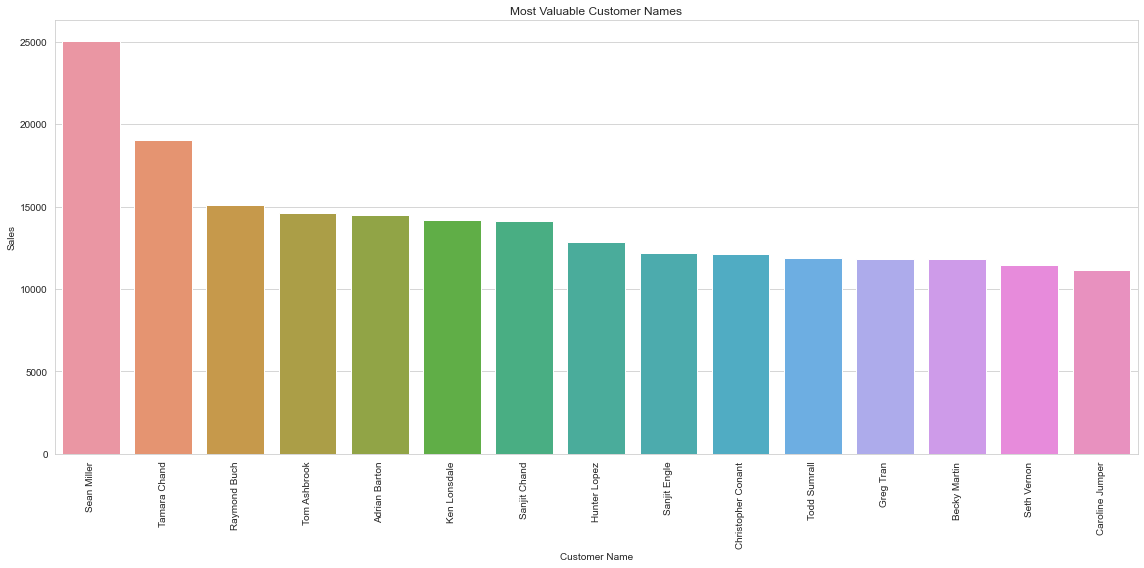

In [100]:
top_customer_sales = df_changed.groupby(by="Customer Name").sum().sort_values("Sales", ascending=False).reset_index().head(15)

plt.figure(figsize=(16.0, 8.0))
sns.barplot(data=top_customer_sales, x="Customer Name", y="Sales")
plt.title("Most Valuable Customer Names")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r"figures\most_valuable_customers.pdf")
plt.show()

Sean Millner is the most valuable customer. Not bad Sean!

### Segment
Let's now further investigate the different Segments the superstore makes money in.

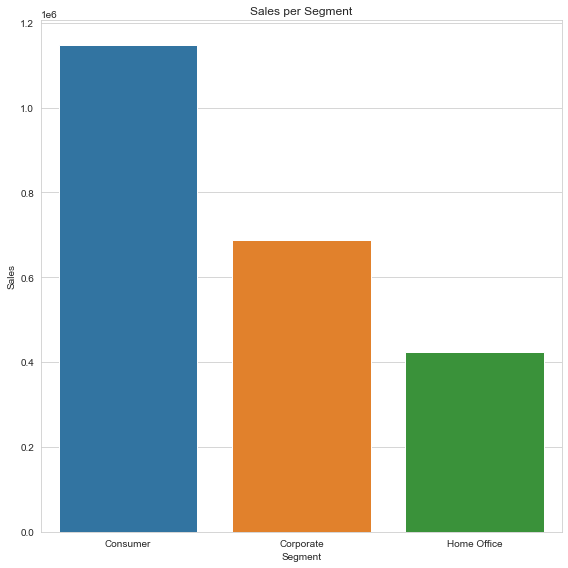

In [111]:
sales_per_segment = df_changed.groupby("Segment").sum().sort_values("Sales", ascending=False).reset_index()

sns.barplot(data=sales_per_segment, x="Segment", y="Sales")
plt.title("Sales per Segment")
plt.tight_layout()
plt.savefig(r"figures\sales_per_segment.pdf")
plt.show()

Let's now also create a pie plot, because this one is way better to visualize the proportions.

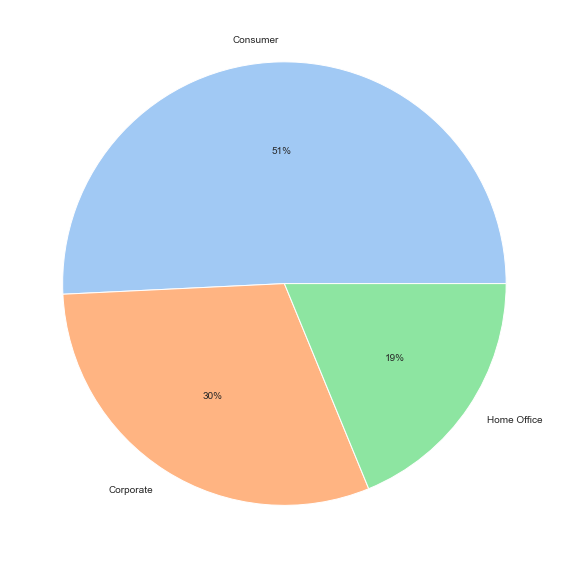

In [107]:
colors = sns.color_palette('pastel')[0:3]
plt.pie(sales_per_segment["Sales"].values, labels=sales_per_segment["Segment"].values, colors = colors, autopct='%.0f%%')
plt.tight_layout()
plt.savefig(r"figures\sales_per_segment_pie_chart.pdf")
plt.show()

### Category and Sub-Category
Let's now dive deeper into the different categories and sub-categories.

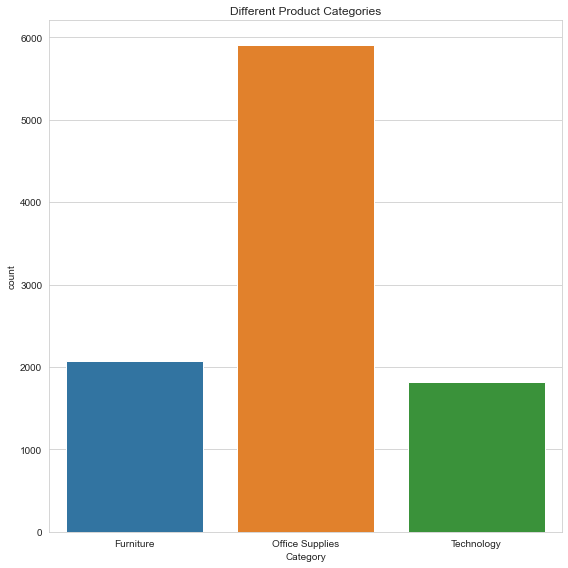

In [110]:
sns.countplot(data=df_changed, x="Category")
plt.title("Different Product Categories")
plt.tight_layout()
plt.savefig(r"figures\product_categories.pdf")
plt.show()

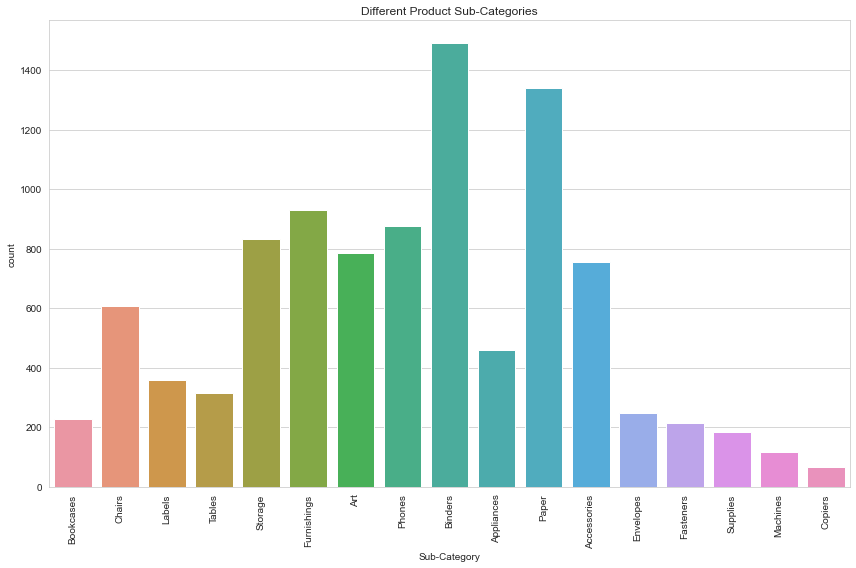

In [114]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_changed, x="Sub-Category")
plt.title("Different Product Sub-Categories")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r"figures\product_sub_categories.pdf")
plt.show()

Let's also get the sales per sub-categories and plot the most valuable sub-categories.

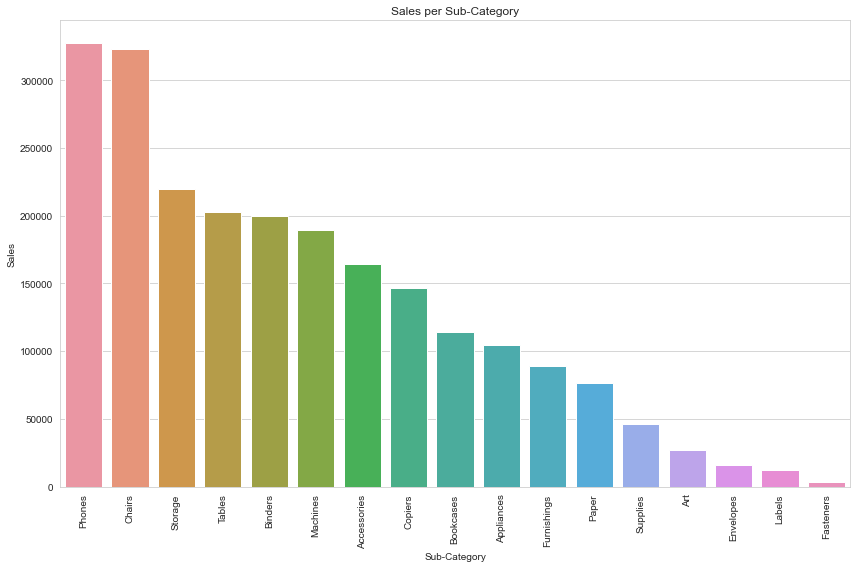

In [116]:
sale_per_sub_category = df_changed.groupby(by="Sub-Category").sum().sort_values("Sales", ascending=False).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data=sale_per_sub_category, x="Sub-Category", y="Sales")
plt.title("Sales per Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r"figures\sales_per_sub_category.pdf")
plt.show()

So phone and chairs are the most valuable sub-categories and both are achieving almost the same amount of sales value for the superstore. <br> <br>
Let's now plot the sales per category and sub-category into one plot.

In [125]:
sales_per_category_sub_category = (df_changed
                                   .groupby(['Category','Sub-Category'])
                                   .sum()
                                   .sort_values("Sales", ascending=False)
                                   .reset_index())
sales_per_category_sub_category.head()

,Category,Sub-Category,Postal Code,Sales
0,Technology,Phones,47230896.0,327782.448
1,Furniture,Chairs,34322331.0,322822.731
2,Office Supplies,Storage,45580571.0,219343.392
3,Furniture,Tables,18213622.0,202810.628
4,Office Supplies,Binders,82120128.0,200028.785


In [128]:
sales_per_category = (sales_per_category_sub_category
                      .groupby(by="Category")
                      .sum()
                      .sort_values("Sales", ascending=False)
                      .reset_index())

In [134]:
sub_categories_and_sales = sales_per_category_sub_category.sort_values("Category")
sub_categories_and_sales

,Category,Sub-Category,Postal Code,Sales
8,Furniture,Bookcases,12602087.0,113813.1987
1,Furniture,Chairs,34322331.0,322822.7310
3,Furniture,Tables,18213622.0,202810.6280
10,Furniture,Furnishings,50410405.0,89212.0180
14,Office Supplies,Envelopes,13074760.0,16128.0460
13,Office Supplies,Art,42721004.0,26705.4100
12,Office Supplies,Supplies,10403108.0,46420.3080
11,Office Supplies,Paper,74650324.0,76828.3040
9,Office Supplies,Appliances,24891326.0,104618.4030
16,Office Supplies,Fasteners,12320752.0,3001.9600


The nested pie plot is inspired by the tutorial on https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html.

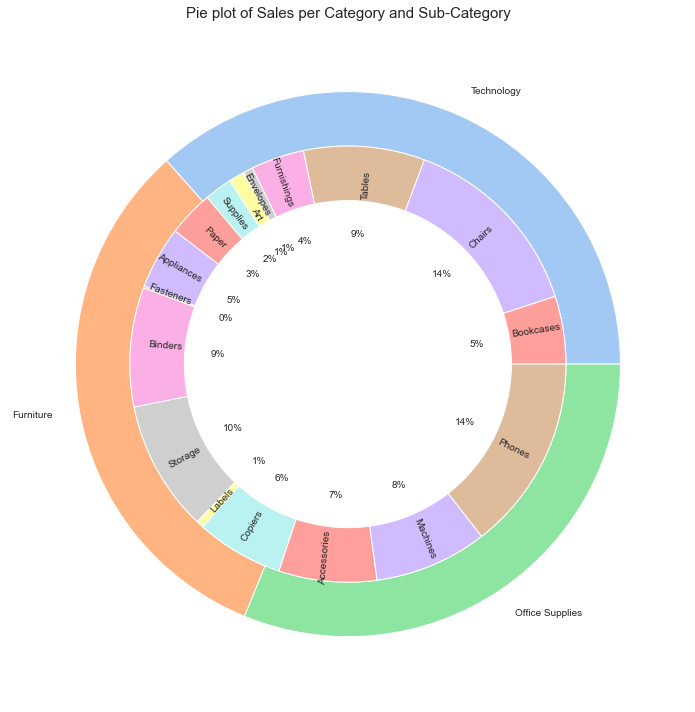

In [163]:
fig, ax = plt.subplots(figsize=(10, 10))

size = 0.2

cmap = plt.get_cmap("tab20c")
outer_colors = sns.color_palette('pastel')[0:3]
inner_colors = sns.color_palette('pastel')[3:15]

ax.pie(sales_per_category["Sales"].values, 
       labels=sales_per_category["Category"].values, 
       colors = outer_colors, 
       radius=1,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(sub_categories_and_sales["Sales"].values, 
       labels=sub_categories_and_sales["Sub-Category"].values, 
       labeldistance=0.76,
       colors = inner_colors,
       radius=1-size,
       wedgeprops=dict(width=size, edgecolor='w'),
       rotatelabels =True,
       autopct='%.0f%%',
       pctdistance=0.6)

ax.set(aspect="equal")
ax.set_title('Pie plot of Sales per Category and Sub-Category', fontsize=15)
plt.tight_layout()
plt.savefig(r"figures\pie_plot_category_sub_category.pdf")
plt.show()

### Product Name
Let's also check the product names. Here, let's again check the products leading to the highest sales numbers.

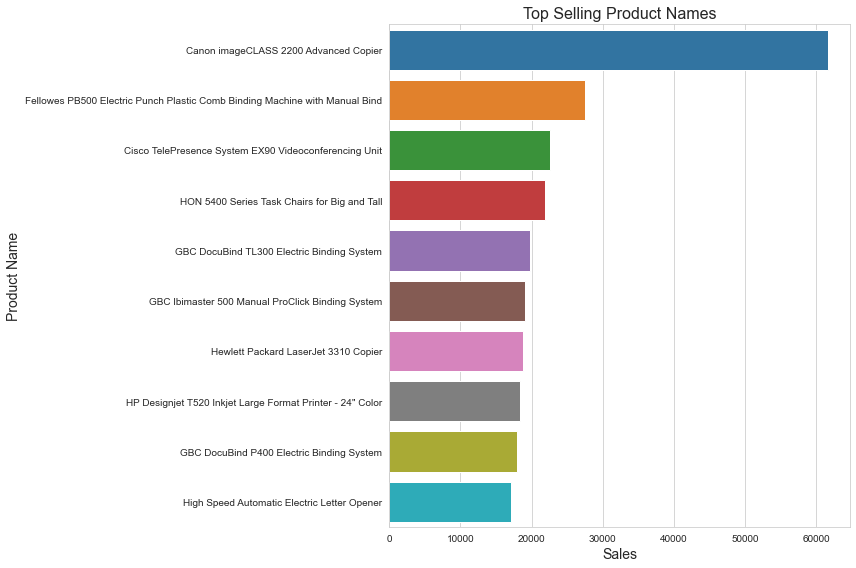

In [175]:
top_sales_products = df_changed.groupby(by="Product Name").sum().sort_values("Sales", ascending=False).reset_index().head(10)

plt.figure(figsize=(12,8))
sns.barplot(data=top_sales_products, x="Sales", y="Product Name", orient="h")
plt.title("Top Selling Product Names", size=16)
plt.ylabel("Product Name", size=14)
plt.xlabel("Sales", size=14)
plt.tight_layout()
plt.savefig(r"figures\top_selling_product_names.pdf")
plt.show()

### Ship Mode
Let's check the ship mode feature and again the sales their.